In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [41]:
df = pd.read_csv('heart_disease_dataset.csv')

In [42]:
df.shape

(1000, 16)

In [43]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [44]:
df.tail()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1
999,53,Male,226,116,82,Current,NaN,6,No,No,Yes,5,161,Yes,Asymptomatic,1


In [45]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [47]:
df.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,340
Exercise Hours,0
Family History,0
Diabetes,0


In [48]:
#how many class of one feature or target
df["Heart Disease"].value_counts()

,count
Heart Disease,
0,608
1,392


In [49]:
#lebel encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Chest Pain Type"] = le.fit_transform(df["Chest Pain Type"])
# df["thal"] = le.fit_transform(df["thal"])

<Axes: xlabel='Heart Disease'>

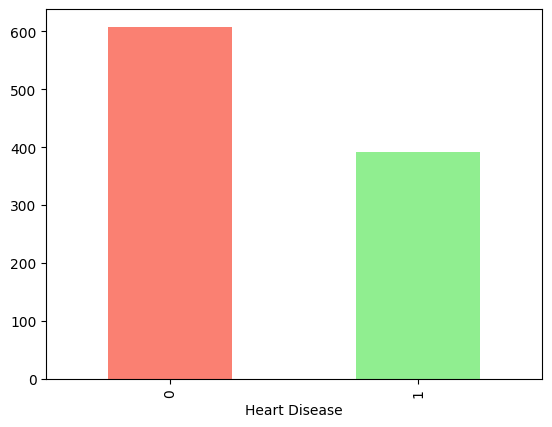

In [64]:
#bar chart
df["Heart Disease"].value_counts().plot(kind='bar', color=["salmon","lightgreen"])

In [65]:
target = 'Heart Disease'
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
y = df[target]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

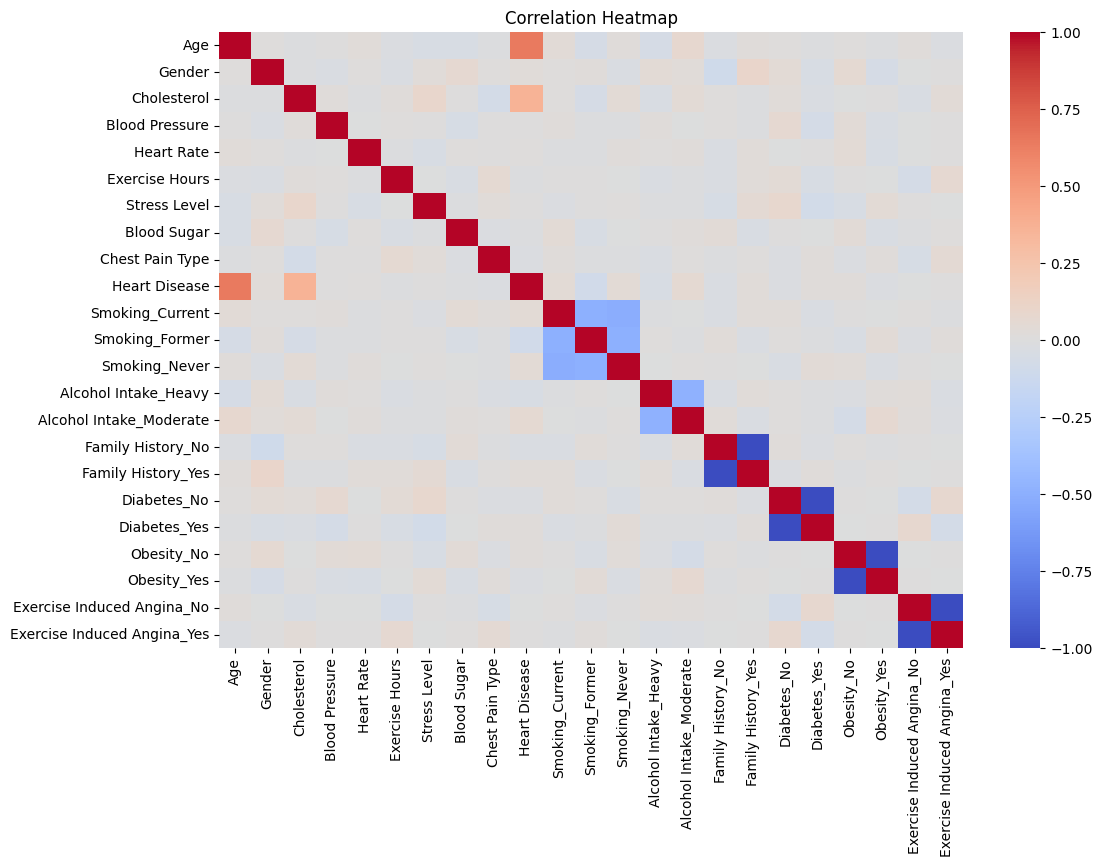

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.get_dummies(df).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [68]:
pd.crosstab(df['Heart Disease'], df.Gender)

Gender,0,1
Heart Disease,,
0,313,295
1,190,202


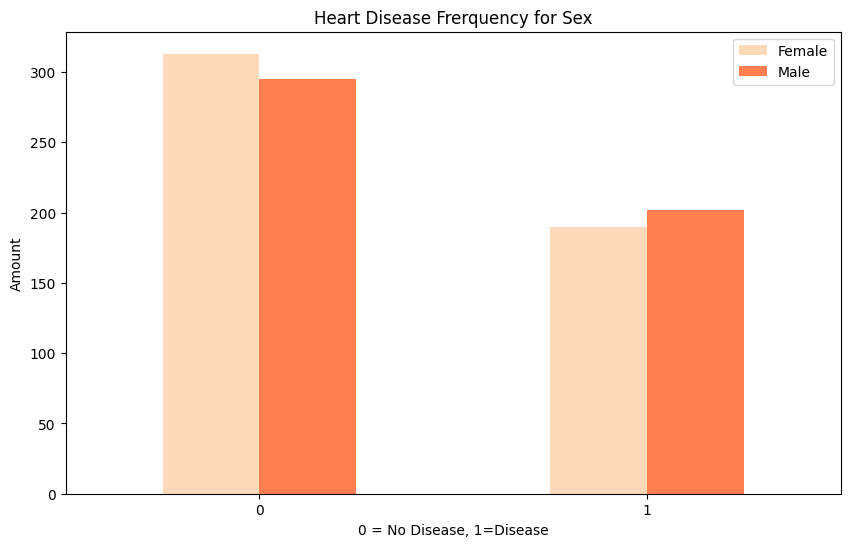

In [69]:
#Create plot of crosstab
pd.crosstab(df['Heart Disease'], df.Gender).plot(kind="bar",figsize=(10,6),color=["peachpuff","coral"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [70]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [72]:
from sklearn.svm import SVC
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)


SVC(probability=True)

In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)


GradientBoostingClassifier()

In [76]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [77]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),}

In [78]:
results = []
roc_store = {}

for name, model in models.items():

    if name in ["KNN", "SVM", "Logistic Regression", "Naive Bayes"]:
        model = Pipeline([("scaler", StandardScaler()), ("model", model)])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_proba = model.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    roc_store[name] = (fpr, tpr, auc_score)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        auc_score
    ])

In [79]:
# Convert to DataFrame
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"]
).set_index("Model")

print("\n=== MODEL COMPARISON ===\n")
print(results_df)


=== MODEL COMPARISON ===

                     Accuracy  Precision    Recall  F1-score       AUC
Model                                                                 
Logistic Regression     0.870   0.851351  0.807692  0.828947  0.950189
KNN                     0.835   0.800000  0.769231  0.784314  0.901061
SVM                     0.900   0.891892  0.846154  0.868421  0.976145
Decision Tree           1.000   1.000000  1.000000  1.000000  1.000000
Random Forest           0.990   1.000000  0.974359  0.987013  1.000000
Gradient Boosting       1.000   1.000000  1.000000  1.000000  1.000000
Naive Bayes             0.925   0.956522  0.846154  0.897959  0.985498


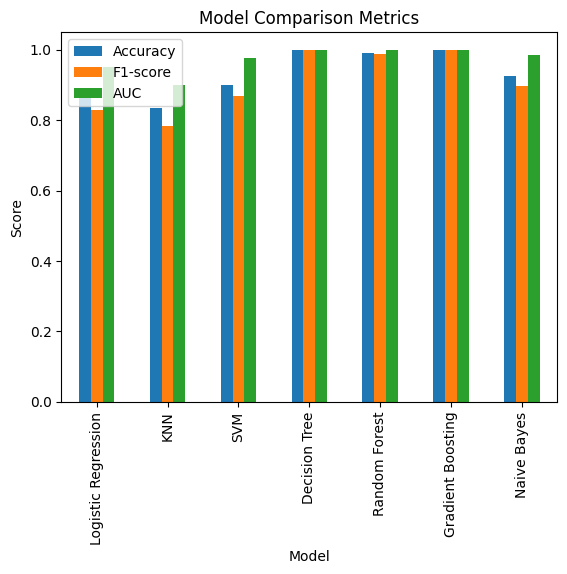

In [80]:
# MODEL COMPARISON BAR GRAPH
results_df[["Accuracy", "F1-score", "AUC"]].plot(
    kind="bar",


)

plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.show()


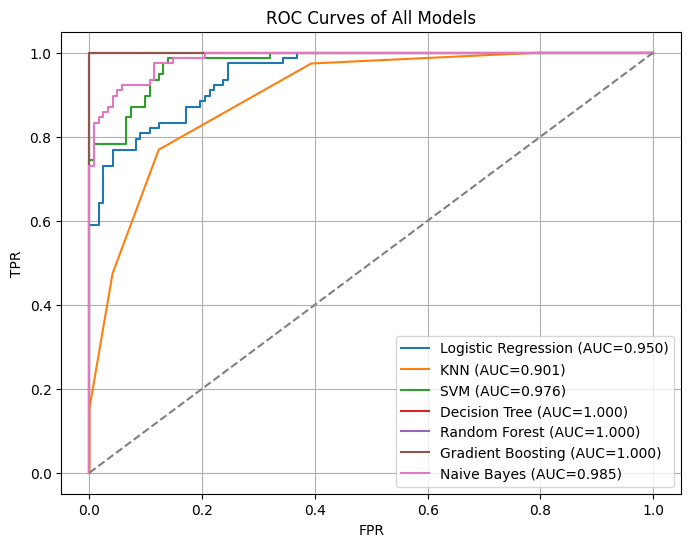

In [81]:
plt.figure(figsize=(8,6))
for name, (fpr, tpr, auc) in roc_store.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1],"--", color="gray")
plt.title("ROC Curves of All Models")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()

In [82]:
best_model_name = results_df["F1-score"].idxmax()
print("\n BEST MODEL NAME IS:", best_model_name)
best_model = models[best_model_name]


 BEST MODEL NAME IS: Decision Tree


In [83]:
best_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_model)
]) if best_model_name in ["KNN","SVM","Logistic Regression","Naive Bayes"] else best_model

best_pipeline.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
def predict_patient(data_dict):
    df_input = pd.DataFrame([data_dict])
    df_input = pd.get_dummies(df_input).reindex(columns=X.columns, fill_value=0)
    pred = best_pipeline.predict(df_input)[0]
    return "Heart Disease" if pred == 1 else "No Heart Disease"

# Example input
sample_patient = {
    'Age': 52,
    'Gender': 'Male',
    'Cholesterol': 240,
    'Blood Pressure': 150,
    'Heart Rate': 140,
    'Diabetes': 1,
    'Smoking': 0,
    'Family History': 1,
    'Exercise Induced Angina': 1,
    'Chest Pain Type': 'NAP'
}

print("\nReal-World Prediction:", predict_patient(sample_patient))


Real-World Prediction: Heart Disease


In [85]:
def predict_patient(data_dict):
    df_input = pd.DataFrame([data_dict])
    df_input = pd.get_dummies(df_input).reindex(columns=X.columns, fill_value=0)
    pred = best_pipeline.predict(df_input)[0]
    return "Heart Disease" if pred == 1 else "No Heart Disease"

# Example input
sample_patient = {
    'Age': 20,
    'Gender': 'Female',
    'Cholesterol': 180,
    'Blood Pressure': 110,
    'Heart Rate': 140,
    'Diabetes': 1,
    'Smoking': 0,
    'Family History': 1,
    'Exercise Induced Angina': 1,
    'Chest Pain Type': 'NAP'
}

print("\nReal-World Prediction:", predict_patient(sample_patient))


Real-World Prediction: No Heart Disease
